[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nunososorio/SingleCellGenomics2024/blob/main/1_Monday_April8th/NB1_Intro_pandas.ipynb)



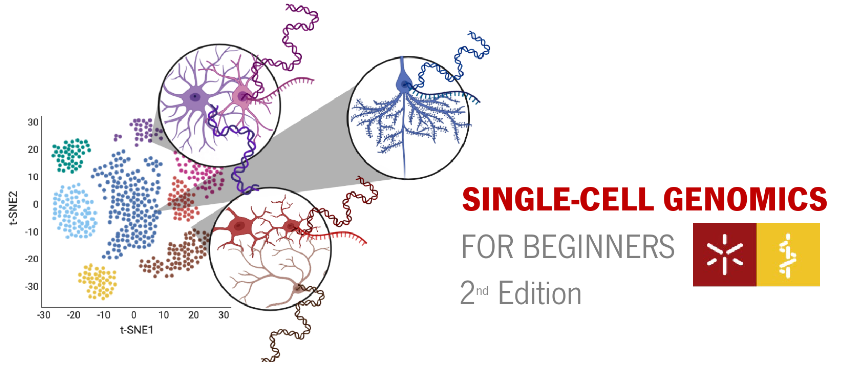

# Setup the environment

The *basic* libraries (Numpy, Pandas, Matplotlib, Seaborn...) that we will use are already installed in Colab.

In [ ]:
# Import all the libraries we will use
import numpy as np
import random
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Some details for the plots
plt.rcParams.update({'font.size':18, 'figure.figsize':(8,8)})

# Data structures for Bioinformatics

Biological data in omics era is very rich, with observations about a patient, a cell or a tissue described by 100s or 1000s of variables (genes, proteins, polymorphisms, methylation states...).

Analyzing this data is a difficult process: it requires understanding statistical methods and plenty of domain-specific knowledge.

One of the challenges is how to access and manipulate and store the data that we have generated from experiments.


# Notebook 1 - Basic data structures - why do we use  [Pandas](https://pandas.pydata.org/)

In this notebook we will see how things look like when you handle **high-dimensional** data directly and how you can make things **easier** using data structures meant to store tabulated data.

We **could** do things the hard way, but there is no need to...

<img src="https://github.com/Leo-GG/bhs/blob/main/Data_structures/Illustrations/transition.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

# Basic data structures

### Generate random data - you can hide this

In [ ]:
# Let's generate the data
n_samples=50
# High values for sick patients
simulated_beta = list(np.random.normal(0.6, 0.1, n_samples))
np.clip(simulated_beta, 0, 1)
# Add uniformly distributed values for healthy patients
simulated_beta = simulated_beta+[random.uniform(0.0, 1.0) for _ in range(n_samples)]

# Make a list of labels to identify the patients condition
simulated_label = ['D']*n_samples+['H']*n_samples

# Scramble the order
idx_= np.arange(n_samples*2)
np.random.shuffle(idx_)

simulated_beta=np.array(simulated_beta)[idx_]
simulated_label=np.array(simulated_label)[idx_]

## Simple data

**Suppose you get data from 100 subjects that are either healthy (H) or diseased (D).**
You have information on one gene/protein/molecule... per subject and information about the condition of the subject
<br/><br/>


<img src="https://github.com/Leo-GG/bhs/blob/main/Data_structures/Illustrations/premise1.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

<br/><br/>




**This data can be stored as two separated arrays. We can easily read it, we can manipulate it and analyze it but this is not a very convenient way**

- **simulated_beta** is an array holding the values of the feature
- **simulated_label** is another array holding the labels (D or H) for each subject
<br/><br/>



In [ ]:
# Check the dimensions of the arrays
print(simulated_beta.shape)
print(simulated_label.shape)

In [ ]:
# Check the variable types
print(type(simulated_beta))
print(type(simulated_label))

In [ ]:
# See the actual values
simulated_beta

In [ ]:
simulated_label

**We can plot this data**

In [ ]:
# Let's make a histogram:

# First we split the data based on the annotation: one vector of values for diseased subjects, and one for healthy ones
# Note that we have to do this "manually"
healthy_values = [beta for beta, condition in zip(simulated_beta, simulated_label) if condition=='H']
diseased_values = [beta for beta, condition in zip(simulated_beta, simulated_label) if condition=='D']


In [ ]:
# Check you have the right amount of data
len(diseased_values)

In [ ]:
# Then make one plot for each with different colors
plt.hist(x=healthy_values, bins=20, color='b')
plt.hist(x=diseased_values, bins=20, color='r')

**We can run statistical tests on this data using the scipy library**

In [ ]:
# We imported scipy earlier, but just as a reminder
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

# If you didn't do it for the plot, you have to separate the data by label
healthy_values = [beta for beta, condition in zip(simulated_beta, simulated_label) if condition=='H']
diseased_values = [beta for beta, condition in zip(simulated_beta, simulated_label) if condition=='D']

# Run the test
t_statistic, p_value = ttest_ind(healthy_values, diseased_values)

# Print the p-value
print(p_value)

In [ ]:
statistic, p_value = wilcoxon(healthy_values, diseased_values)
print(p_value)

# How about more realistic data?

### Generate more random data - you can hide this

In [ ]:
n_samples=50
n_vars=80

np.random.seed(42)

# Some data for the diseased: half of the variables have uniform distributions
simulated_betas=np.random.rand(n_samples, int(np.floor(n_vars/2)) )

# The other half are normally distributed with random means between 0.5 and 0.9
for i in range(int(np.floor(n_vars/2))):
    new_col=np.random.normal(loc=random.uniform(0.5, 0.9), scale=0.1, size=(n_samples, 1))
    np.clip(new_col, 0, 1)
    simulated_betas=np.hstack((simulated_betas,new_col))

simulated_betas=np.vstack((simulated_betas,np.random.rand(n_samples, n_vars) ))

# Add labels for patients
simulated_labels = ['D']*n_samples+['H']*n_samples

# Add labels for genes
# Sample list of prefixes and suffixes to create fictional gene names
g_prefixes = ['OLIG1', 'TP53', 'EGFR', 'STAT', 'ATM', 'MYC', 'PORT', 'MAPK','TAC','SOL','ARTQ','BRAG','RCDLP','MT']
g_suffixes = ['_NC','A', 'B', 'C', 'D', 'E','F','-2','X','-1']

# Generate a list of 60 gene names
gene_names = random.sample([prefix + suffix for prefix in g_prefixes for suffix in g_suffixes], n_vars)
gene_names[5]='ARTQFw'
gene_names[42]='MYCF_T'
gene_names[17]='TP53D-3'

# Scramble the subject order
idx_s= np.arange(n_samples*2)
np.random.shuffle(idx_s)

# Scramble the variable order
idx_v= np.arange(n_vars)
np.random.shuffle(idx_v)

simulated_labels=np.array(simulated_labels)[idx_s]
gene_names=np.array(gene_names)[idx_v]

simulated_betas=simulated_betas[idx_s][:,idx_v]

## High dimensional data

**Now suppose you are running a modern experiment, with many variables per sample**

<br/><br/>


<img src="https://github.com/Leo-GG/bhs/blob/main/Data_structures/Illustrations/premise2.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

<br/><br/>


In [ ]:
#Let's see what are the dimensions of the data

# A data matrix
print(simulated_betas.shape)
# With patients labeled as healthy (H) or diseased (D)
print(simulated_labels.shape)
# And variables with gene-like names
print(gene_names.shape)

**We can still use this, but it starts to become inconvenient**

- **We have three separated structures (data matrix, subject labels, gene labels) and we have to manipulate them individually**

- **We have to index things manually because these variables are not related to each other**

In [ ]:
## Plot the value of a specific "gene" on both groups ##

# Get the index of the gene
idx = np.where(gene_names == 'ARTQFw')[0]
# Get the data from the matrix
gene_data=simulated_betas[:,idx].flatten()

# Split the data, get one array for diseased and one for healthy patients
healthy_values = [beta for beta, condition in zip(gene_data, simulated_labels) if condition=='H']
diseased_values = [beta for beta, condition in zip(gene_data, simulated_labels) if condition=='D']

# Then make separated plots to assign different colors
plt.hist(x=healthy_values, bins=20, color='b')
plt.hist(x=diseased_values, bins=20, color='r')

In [ ]:
# What if we want to test all genes for differences between groups?

# We imported scipy earlier, but just as a reminder
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

for g in gene_names:
  # Get the index of the gene
  idx = np.where(gene_names == g)[0]
  # Get the data from the matrix
  gene_data=simulated_betas[:,idx].flatten()

  # Split the data, get one array for diseased and one for healthy patients
  healthy_values = [beta for beta, condition in zip(gene_data, simulated_labels) if condition=='H']
  diseased_values = [beta for beta, condition in zip(gene_data, simulated_labels) if condition=='D']
  t_statistic, p_value = ttest_ind(healthy_values, diseased_values)

  print(f'P-value for {g} is {p_value}')

# Making your life easier with [Pandas](https://pandas.pydata.org/)

**We can store our data and labels using a data structure meant for tabular data: the *DataFrame* implemented in the [Pandas](https://pandas.pydata.org/) library**

<br/><br/>


<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.freecodecamp.org%2Fnews%2Fcontent%2Fimages%2F2020%2F07%2Fpandas-logo.png&f=1&nofb=1&ipt=33e1b23d5cea00213aa19a52eb3f25a71f2331d2cbd132120a90b295e40e9da9&ipo=images" alt="Pandas" style="width:600px; height:auto;"/>

<br/><br/>




**Using DataFrames instead of arrays makes it easier to index, explore and manipulate our data**
<br/><br/>



In [ ]:
# We imported Pandas earlier, but here is a reminder
import pandas as pd

# Let's create a DataFrame from our simulated data

df=pd.DataFrame(data=simulated_betas)

In [ ]:
# Now we can check how it looks, looking at the first few rows

df.head(3)

In [ ]:
# We can use the pseudo-gene names to name the columns

df.columns=gene_names

In [ ]:
df.head(3)

In [ ]:
# And we will add the subject condition as an extra column

df['Condition']=simulated_labels

In [ ]:
df.head(3)

### **Now the 3 Python objects are in a single one!!!**

## Indexing a DataFrame

**Using DataFrames, it is easy to access data about a single gene, select subjects based their Condition label or select data using arbitrary criteria**

<br/><br/>


In [ ]:
# Check the ARTQFw and the MYCF_T genes

df.loc[:,['ARTQFw','MYCF_T']]

In [ ]:
# ...but only on patients 8, 24, 7 and 63
df.loc[[8, 24, 7, 63], ['ARTQFw','MYCF_T']]

In [ ]:
# Subset by index
df.iloc[[9,23,5],[0,2,4,6]]

In [ ]:
# Use a arbitrary condition
df.loc[df.ARTQFw>0.8]

## Exploring the data

**Pandas provides convenient functions to explore the data**
<br/><br/>


In [ ]:
# General statistics of each variable
df.describe()

In [ ]:
# Average per gene (column)
df.mean()

In [ ]:
# Average per subject (row)
df.mean(axis=1)

In [ ]:
# And many other options, e.g.

# Sum over rows (axis=0) or over columns (axis=1)
df.sum(axis=0)

In [ ]:
# Divide each column (except the last one) by its mean
df.iloc[:,:-1].div(df.mean(axis=0))
# ...

In [ ]:
# You can also group values and apply operations to them

#Let's compute the mean of each "gene" on each group
df.groupby('Condition').mean()

In [ ]:
# If we do the difference between these means we will see the genes with large changes between groups
df.groupby('Condition').mean().diff(axis=0)

## Making visualizations

**Pandas has native plotting functions. Not the most powerful ones, but very very easy to use**

<br/><br/>


In [ ]:
# Plot the histogram of one gene on each group
df.hist(by='Condition', column='TP53D-3', figsize=(10, 8))

In [ ]:
# Boxplots
df.plot.box(column="TP53D-3", by="Condition", figsize=(10, 8))

# Other libraries work great with DataFrames!

## [Seaborn](https://seaborn.pydata.org/)
**The [Seaborn](https://seaborn.pydata.org/) library provides many functions to plot data from dataframes, it makes very easy to create different types of visualizations**
<br/><br/>

In [ ]:
# Remember we did this!
import seaborn as sns

# Make histograms of a gene per group, include the estimated density functions
sns.histplot(data=df, x='ARTQFw', hue='Condition', kde=True, stat='density')
sns.despine()

In [ ]:
# Plot once gene against another, color by group
sns.scatterplot(data=df, x='TP53D-3', y='MYCF_T', hue='Condition')
sns.despine()

## Check the [gallery](https://seaborn.pydata.org/examples/index.html) to see what else you can do!


## [sci-kit learn](https://scikit-learn.org/stable/index.html)
**The [sci-kit learn](https://scikit-learn.org/stable/index.html) (sklearn) library is a powerful library which implements many machine learning methods**

**You can use it to do regression, classification, clustering... in few lines of code!**

<br/><br/>

In [ ]:
# E.g. make a classifier for our data using logistic regression

# First we have to import the model
from sklearn.linear_model import LogisticRegression
# And instantiate it
model = LogisticRegression()

# Then we directly *fit* the model to our data
# We use all the genes as features (X)
# The "Condition" label (diseased/healthy) as the target (y)
model.fit(X=df.iloc[:,:-1], y=df.Condition)

In [ ]:
# Use the model to predict the labels
model.predict(df.iloc[:,:-1])

In [ ]:
# See the coefficients of the model (the "weight" of each feature in the predictions)
model.coef_

In [ ]:
# Compare the predictions to the real labels
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true=df.Condition,  y_pred=model.predict(df.iloc[:,:-1]) )

print('Model accuracy: ' + str(acc) )


In [ ]:
# ...

<img src="https://github.com/Leo-GG/bhs/blob/main/Data_structures/Illustrations/dont_panic.jpg?raw=true" alt="AnnData" style="width:600px; height:auto;"/>


- There is plenty of great documentation out there
  - Libraries APIs: [Pandas](https://pandas.pydata.org/), [Seaborn](https://seaborn.pydata.org/), [sklearn](https://scikit-learn.org/stable/index.html)
  - Tutorials and how-to guides:
    - https://www.datacamp.com/tutorial/pandas
    - https://www.w3schools.com/python/pandas/default.asp
    - https://seaborn.pydata.org/tutorial.html
    - https://scikit-learn.org/stable/tutorial/index.html
    - ...

- If you google your questions nowadays you are likely to get a guide
  - e.g. [How do I normalize a dataframe in Python?](https://www.google.com/search?q=how+do+i+normalize+a+dataframe+in+python%3F&sca_esv=4565a9eaa81cf1bb&source=hp&ei=cOHHZZjhGo2B9u8P7tiWkAs&iflsig=ANes7DEAAAAAZcfvgFYJtg4fAHl-PprAEXsVmJ4UOg80&ved=0ahUKEwiY2bf90qGEAxWNgP0HHW6sBbIQ4dUDCAw&uact=5&oq=how+do+i+normalize+a+dataframe+in+python%3F&gs_lp=Egdnd3Mtd2l6Iilob3cgZG8gaSBub3JtYWxpemUgYSBkYXRhZnJhbWUgaW4gcHl0aG9uPzIGEAAYFhgeMgsQABiABBiKBRiGAzILEAAYgAQYigUYhgNI8y5QAFiELXAAeACQAQCYAbACoAGFOKoBCTAuMzAuMTAuMbgBA8gBAPgBAcICBRAAGIAEwgILEC4YgAQYxwEY0QPCAg4QLhiABBjHARjRAxjUAsICCBAuGIAEGNQCwgIFEC4YgATCAgcQABiABBgKwgIIEAAYFhgeGA8&sclient=gws-wiz)

- And of course LLMs are now great at coding
  - [ChatGPT](https://chat.openai.com/)
  - [Open LLMs (Mixtral, Ollama...)](https://chat.lmsys.org/)

# Reading and writing your data
**Pandas includes functions to read and write data to and from csv, Excel files and formats for large datasets**

<br/><br/>

In [ ]:
# Write your data in plain text to a file, in Comma Separated Values (csv) format
df.to_csv('My_data.csv')

In [ ]:
pd.read_csv('My_data.csv', index_col=0)

In [ ]:
# You can also read and write to an excel file
df.to_excel('My_data.xlsx',sheet_name='simulated_data')

In [ ]:
pd.read_excel('My_data.xlsx',sheet_name='simulated_data', index_col=0)

In [ ]:
# And you can use formats for large datasets, like Pickle or Parquet
df.to_pickle('My_data.pkl')

In [ ]:
pd.read_pickle('My_data.pkl')

In [ ]:
df.to_parquet('My_data.parquet')

In [ ]:
pd.read_parquet('My_data.parquet')